# Домашнее задание к лекции "Корреляция и корреляционный анализ"

### Задание 1

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

a. Построить точечный график.

b. Рассчитать коэффициенты корреляции Пирсона и Спирмена.

c. Построить модель линейной регрессии.

d. Рассчитать коэффициент детерминациии.Вывести график остатков.

In [1]:
# Импортируем необходимые для работы библиотеки

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загружаем датасет с данными по средней годовой смертности и концентрации кальция в питьевой воде
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


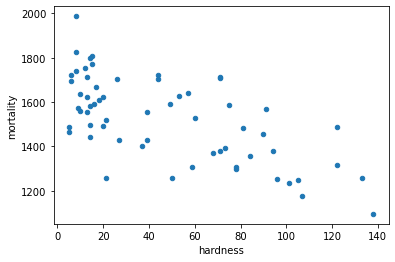

In [3]:
# Строим точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

Из графика можно сделать вывод, что корреляция обратная - переменные связаны таким образом, что при возрастании значений одной из них значения другой убывают (чем меньше концентрация кальция в воде, тем выше смертность). Исследуем дальше.

In [4]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


## Построим модель линейной регрессии

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df['hardness']
y = df['mortality']

In [8]:
# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [11]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

### Делаем вывод: зависимость слабая, т.к. коэфициент детерминации чуть больше 50%, модель неприемлемая, нет возможности рассмотреть зависимость от других данных. Необходимо корректировать, дополнять данные или пробовать другую модель. Для наглядности посмотрим на остатки.

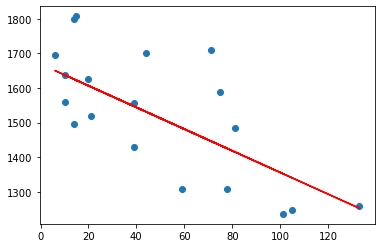

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Задание 2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

a. Разделить данные на 2 группы.

b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

In [13]:
# Разделим данный датасета на две группы: северные и южные города
df_1 = df[df.location == 'North']
df_2 = df[df.location == 'South']

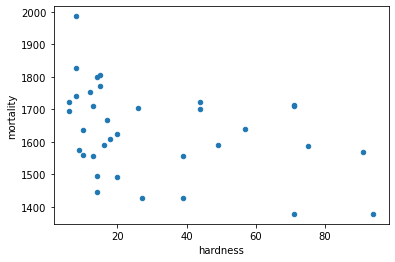

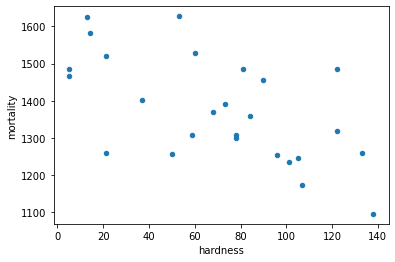

In [14]:
df_1.plot(kind='scatter', x='hardness', y='mortality')
df_2.plot(kind='scatter', x='hardness', y='mortality')

In [15]:
# Корреляция Пирсона
df_1[['hardness', 'mortality']].corr()

# Слабая корреляция, не берем в расчет

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [16]:
df_2[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [17]:
# Корреляция Спирмена
df_1[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [18]:
df_2[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


## Построим модели линейной регрессии

In [19]:
# Для северных городов
X = df_1[['hardness']]
y = df_1['mortality']

# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# метод обучается на данных и подбирает оптимальные коэффициенты
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

# метод возвращает значение коэффициента детерминации
model_1.score(X_test, y_test) 

0.018885304285745863

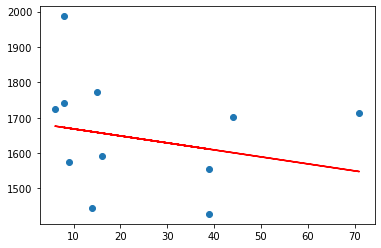

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [21]:
# Для южных городов
X = df_2[['hardness']]
y = df_2['mortality']

# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# метод обучается на данных и подбирает оптимальные коэффициенты
model_2 = LinearRegression()
model_2.fit(X_train, y_train)  

y_pred = model_1.predict(X_test)

# метод возвращает значение коэффициента детерминации
model_2.score(X_test, y_test)

-2.5519223012352077

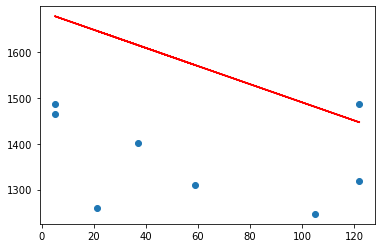

In [22]:
# Выведем график остатков
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Отрицательный коэффициент детерминации и почти 0 говорят о крайней неадекватности моделей, большой разброс данных, нет смысла рассматривать связи отдельно по северным и южным городам.